In [3]:
import matplotlib.pyplot as plt
import json

In [5]:
with open("bm25_qwen38b_retr50.json", "r", encoding="utf-8") as f:
    results = json.load(f)

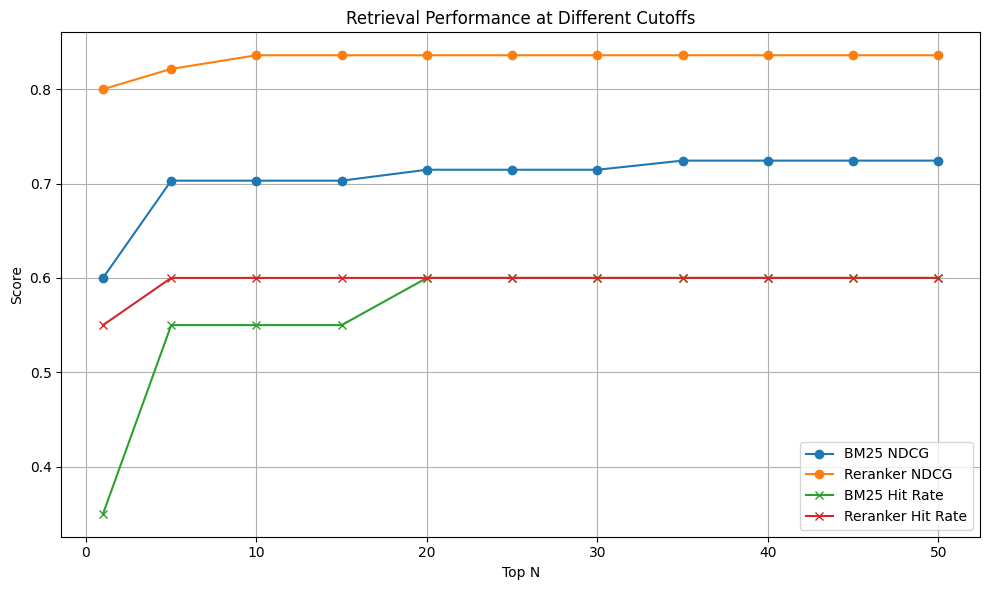

In [6]:
cutoff_list = results["cutoff_list"]
bm25_scores_at_n = results["bm25_scores_at_n"]
rerank_scores_at_n = results["rerank_scores_at_n"]

# Compute mean for each cutoff
bm25_ndcg_list = [sum(bm25_scores_at_n[str(n)]['ndcg'])/len(bm25_scores_at_n[str(n)]['ndcg']) for n in cutoff_list]
rerank_ndcg_list = [sum(rerank_scores_at_n[str(n)]['ndcg'])/len(rerank_scores_at_n[str(n)]['ndcg']) for n in cutoff_list]
bm25_hit_list = [sum(bm25_scores_at_n[str(n)]['hit'])/len(bm25_scores_at_n[str(n)]['hit']) for n in cutoff_list]
rerank_hit_list = [sum(rerank_scores_at_n[str(n)]['hit'])/len(rerank_scores_at_n[str(n)]['hit']) for n in cutoff_list]

plt.figure(figsize=(10,6))
plt.plot(cutoff_list, bm25_ndcg_list, marker='o', label='BM25 NDCG')
plt.plot(cutoff_list, rerank_ndcg_list, marker='o', label='Reranker NDCG')
plt.plot(cutoff_list, bm25_hit_list, marker='x', label='BM25 Hit Rate')
plt.plot(cutoff_list, rerank_hit_list, marker='x', label='Reranker Hit Rate')
plt.xlabel("Top N")
plt.ylabel("Score")
plt.title("Retrieval Performance at Different Cutoffs")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

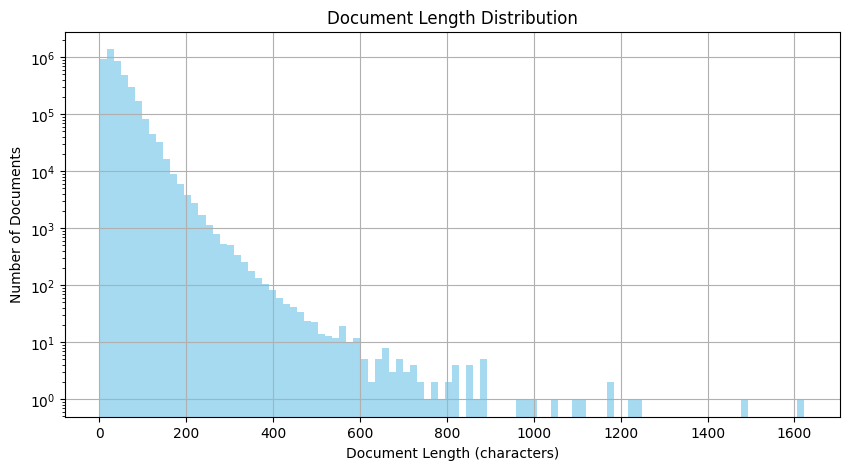

In [19]:
import matplotlib.pyplot as plt
from utils.data_utils import load_pickle_documents

doc_objs = load_pickle_documents("data/sentence_level_docs.pkl")
documents = [doc.page_content for doc in doc_objs]

lengths = [len(doc) for doc in documents]

plt.figure(figsize=(10,5))
plt.hist(lengths, bins=100, color='skyblue', alpha=0.75)
plt.xlabel('Document Length (characters)')
plt.ylabel('Number of Documents')
plt.title('Document Length Distribution')
plt.yscale('log')  # log scale for better visualization
plt.grid(True)
plt.show()

In [11]:
import numpy as np

In [13]:
doc_len_arr = np.array(lengths)

In [14]:
doc_len_arr.mean()

135.45583964989294

In [15]:
doc_len_arr.std()

269.2179786928925

In [16]:
documents[0]

'魯瓦揚地區聖讓 是法國德龍省的一個市鎮,位於該省東北部,屬於瓦朗斯區.該市鎮總面積 27.86 平方公里,2009年時的人口爲3022人.'